<center>
<img src="../Graphics/logo.png" width="600" \>
</center>

# 02 - Hückel Molecular Orbital Theory 

(🚧 **This tutorial is under construction!** 🚧)

This tutorial is part of the [Quantum Chemistry Foundations](https://github.com/fevangelista/Quantum-Chemistry-Foundations) series.

Francesco A. Evangelista

---

In this tutorial, you will explore the basics of molecular orbital theory and the concept of basis and use some linear algebra algorithms that are part of many quantum chemistry methods.

## What is Hückel theory?

Hückel molecular orbital theory describes $\pi$ electrons in planar conjugated organic molecules.
For sp<sup>2</sup> hybridized carbon atom, we consider only the out-of-plane 2p<sub>z</sub> orbital.
Here are some examples of molecules that can be studied with Hückel theory

<center>
<img src="img/examples.png" width="500" />
</center>

An important concept in quantum chemistry is **expressing an unknown quantity, like the molecular orbitals, using a linear combination of basis functions**.
In the case of Hückel theory, we express a molecular orbital ($\psi$) as a sum of atomic orbitals ($\chi_\mu$) times a coefficient $c_\mu$
$$
|\psi \rangle = \sum_{\mu = 1}^{N} |\chi_\mu\rangle c_{\mu} = |\chi_1\rangle c_{1} + |\chi_2\rangle c_{2} + \ldots
+ |\chi_{N}\rangle c_{N}
$$
where $N$ is the **number of atomic orbitals**. In writing this expression, we use **one-based indexing**, since this is how most theory is written down. However, when programming an expression like this we will use **zero-based indexing** since Python, `numpy`, and many programming languages address vectors and matrices in this way.
You should get used to switching back and forth between zero-based and one-based indexing.

<div class="alert alert-block alert-info"> 
<b>NOTE</b>: here, I am using Dirac's notation, so instead of specifying the coordinate dependence of the orbital explicitly as $\psi(x,y,z)$, I will just use the "ket" symbol $|\psi \rangle$.

In Dirac's notation, the overlap integral of quantum states $\psi(x,y,z)$ and $\phi(x,y,z)$ is written as
$$
\int dx dy dz \; \psi^*(x,y,z) \phi(x,y,z) = \langle \psi | \phi \rangle
$$
while the matrix element of an an operator $\hat{O}$ is written as
$$
\int dx dy dz \; \psi^*(x,y,z) \hat{O} \phi(x,y,z) = \langle \psi | \hat{O} | \phi \rangle
$$
</div>

## Visualizing the molecular orbitals

Let's try to get a feeling for how the vector of coefficients that enters into the definition of the molecular orbitals works. We will consider the 2p<sub>z</sub> orbitals of a planar molecule. The code below will show the molecular orbitals and will take as an input the $x_i$ and $y_i$ coordinates of the $i$-th atom and the value of the atomic orbital coefficient $c_i$.

It is not important for you to understand how this function works to follow the next steps. If you are interested the comments in the code should be sufficient. You could also try to use an AI chatbot to ask you to explain how it works.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# generate high-resolution matplotlib figures
%config InlineBackend.figure_format='retina'

def plot_molecular_orbitals(coordinates, coefficients,label=None):
    """A function to plot molecular orbitals with given coordinates and coefficients.
       The probability of finding an electron is proportional to the area of the circles."""
    fig, ax = plt.subplots(figsize=(4,4)) # Create a new figure with a specific size
    ax.set_aspect('equal', 'box') # Set equal aspect ratio 
    # Set plot limits with some padding based on the maximum and minimum of the x and y values
    x_vals, y_vals = zip(*coordinates) # Unzip the coordinates into x and y values
    ax.set_xlim(min(x_vals) - 1, max(x_vals) + 1)
    ax.set_ylim(min(y_vals) - 1, max(y_vals) + 1)      
    for (x, y), c in zip(coordinates, coefficients): # Loop over the coordinates and coefficients
        radius = np.abs(c) * 0.9 # Adjust scale factor for nicer visualization
        color = 'orange' if c > 0 else 'blue' # Set color based on the sign of the coefficient
        # plot the molecular orbitals and atoms        
        mo = plt.Circle((x, y), radius, color=color, alpha=0.5) # Create a circle with the given radius and color
        ax.add_patch(mo) # Add the circle to the plot
        atom = plt.Circle((x, y), 0.05, color='black') # Create a circle for the atom
        ax.add_patch(atom) # Add the atom to the plot
    if label is not None:
        plt.title(label)
    plt.show()

Let's consider the the carbon atoms in the ethylene molecule, at positions $(0,0)$ and $(1.33,0)$. We will now look at what the orbitals look when we change the orbital coefficients.

First, we set one coefficient to one and the other to zero, $(c_1, c_2) = (1.0, 0.0)$. We can see that the molecular orbital is fully localized on the first atom (on the left). Note that since we are plotting the 2p<sub>z</sub> orbital projected on the xy plane, it will look like a circle.

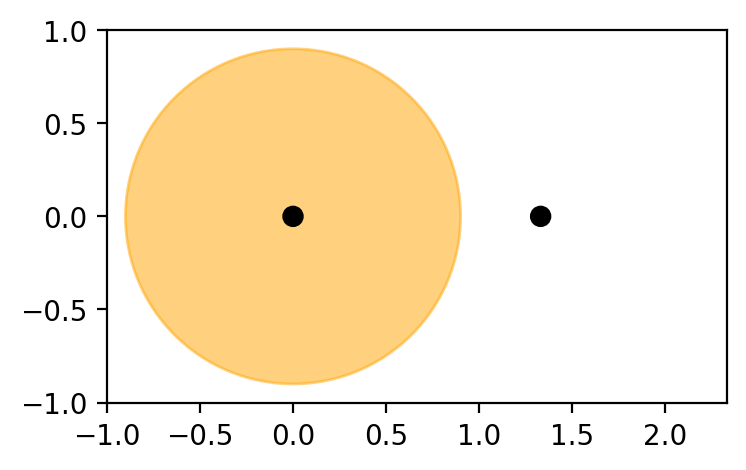

In [2]:
# define atom (x,y) coordinates
coordinates = [(0,0),(1.33,0)]
coefficients = [1.0,0.0]
plot_molecular_orbitals(coordinates, coefficients)

Now let's increase $c_2$ from zero to 0.2 and decrease $c_1$ so that the coefficient vector remains (approximately) normalized to one ($|c_1|^2 + |c_2|^2 = 1$). In this case, the electron is mostly located on the left atom with some density on the right atom

c = (0.9797958971132712, 0.2)


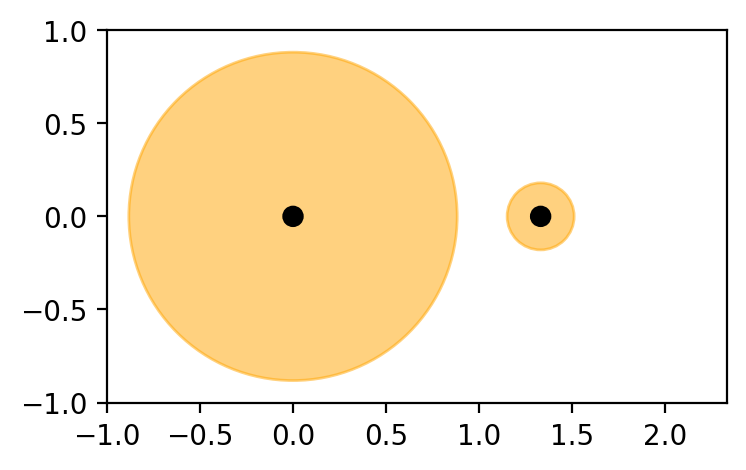

In [3]:
c2 = 0.2
c1 = np.sqrt(1 - c2**2) # normalize the coefficients
print(f'c = {(c1,c2)}')
coefficients = [c1,c2]
plot_molecular_orbitals(coordinates, coefficients)

Now let's consider the case of two equal coefficients, $(c_1,c_2) = (\frac{1}{\sqrt{2}},\frac{1}{\sqrt{2}})$. This corresponds to a bonding orbital.

c = (0.7071067811865476, 0.7071067811865475)


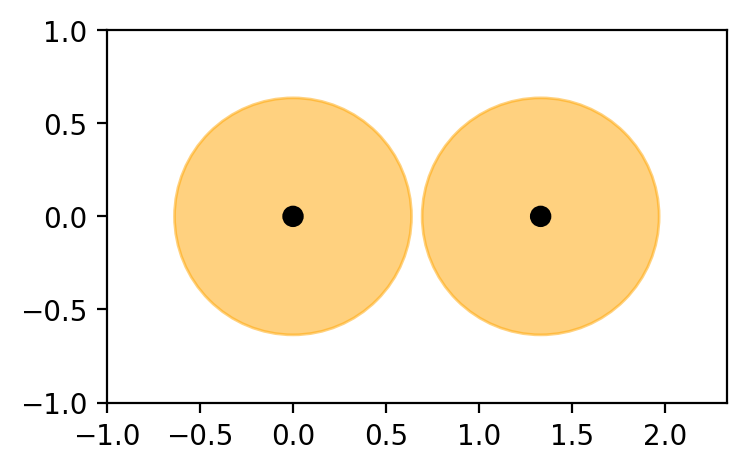

In [4]:
c2 = 1.0/np.sqrt(2)
c1 = np.sqrt(1 - c2**2) # normalize the coefficients
print(f'c = {(c1,c2)}')
coefficients = [c1,c2]
plot_molecular_orbitals(coordinates, coefficients)

### **Exercise**: Play with the molecular orbital visualizer 📝

To become familiar with the idea of representing the molecular orbitals using atomic orbitals and the meaning of the coefficient vector, modify the code below to do the following:

1. Plot the antibonding orbital of ethylene.
2. Plot the molecular orbital of a chain of 3 carbon atoms, with equal and positive coefficients.


In [5]:
# coordinates = ...
# coefficients = ...
# plot_molecular_orbitals(coordinates, coefficients)

## The MO coefficients matrix ($\mathbf{C}$) 👈

When representing molecular orbitals in a basis of atomic orbitals, it is convenient to store all the coefficients together as a matrix.
To understand how this is done, we will consider an example that you should be already familiar with: the molecular orbitals of the H<sub>2</sub> molecule.
The figure below shows how the bonding and antibonding molecular orbitals of H<sub>2</sub> are the plus and minus combination of the 1s atomic orbitals of H on each atom
<center>    
<img src='img/h2_mos.png' width=600 />
</center>

Now, let's rewrite these two orbitals in a slightly different way using linear algebra concepts.
We will consider the atomic orbitals as elements of a **row vector** and the coefficients that multiply these AOs as a **column vector**
<center>    
<img src='img/h2_mos_step_1.png' width=500>
</center>
This is just an equivalent way to rewrite the MOs of H<sub>2</sub>.
<div class="alert alert-block alert-warning"> 
This is an important concept and you should make sure this makes sense to you before moving on.
Remember that when we multiply a row vector times a column vector, we are taking the dot product of them, for example:
\begin{equation}
\begin{pmatrix}
a_1 & a_2
\end{pmatrix}
\begin{pmatrix}
b_1 \\
b_2
\end{pmatrix} = a_1 b_1 + a_2 b_2
\end{equation}
</div>

Next, we go one step further and recognize that we can write both equations using a single equation, where the column vectors are replaced by a **matrix** of column vectors
<center>    
<img src='img/h2_mos_step_2.png' width=675>
</center>

In the general case, we write the $i$-th molecular orbital in the following way
$$
|\psi_i \rangle = \sum_{\mu = 1}^{N} |\chi_\mu\rangle C_{\mu i} = |\chi_1\rangle C_{1 i} + |\chi_2\rangle C_{2 i} + \ldots + |\chi_{N} \rangle C_{N i}
$$
where we introduced the coefficient matrix $C_{\mu i}$.
Note that coefficients for a each orbital are stored as **columns** (the convention is that the first index of a matrix labels the row and the second one the column).

## More on Hückel theory 🔎

Hückel theory is perhaps best understood as a **model** of π electrons in molecules.
In this model, we postulate that the molecular orbitals satisfy a Schrödinger-like equation
$$
\hat{h} |\psi_i \rangle = \varepsilon_i |\psi_i \rangle
$$
where $\hat{h}$ is the Hamiltonian operator.

Contrary to first-principle methods that start from the exact form of the Schrödinger equation, in Hückel theory we do not assume to know its exact form.
Instead, we **parameterize** the matrix elements of the Hamiltonian in the basis of atomic orbitals, which is also called the **matrix representation** of $\hat{h}$ in the atomic basis.
In the simplest form of Hückel theory, the matrix elements are defined by the following condition
$$
\langle \chi_\mu | \hat{h} | \chi_\nu \rangle = \int d\mathbf{r} \; \chi_\mu^*(\mathbf{r})  \hat{h}  \chi_\nu(\mathbf{r}) = 
\begin{cases}
\alpha & \mu = \nu \\
\beta & \text{if $\chi_\mu$ and $\chi_\nu$ are on adjacent atoms} \\
0  & \text{otherwise}
\end{cases}
$$

We also assume that the atomic orbitals are **normalized and orthogonal** (orthonormal), that is the inner product is given by
$$
\langle \chi_\mu | \chi_\nu \rangle = \delta_{\mu \nu} = \begin{cases}
1 & \mu = \nu \\
0 & \text{otherwise}
\end{cases}
$$

## Meaning of the Hückel parameters

The two parameters that enter in Hückel theory have a well-defined chemical meaning.

<center><img src='img/params.png' width="600" /></center>

- The diagonal matrix element $\langle \chi_\mu | \hat{h} |\chi_\mu \rangle = \alpha$, corresponds to the negative of the ionization potential for a C atom orbital. This quantity has a value of about -11.4 eV.
- The off-diagonal matrix element $\langle \chi_\mu | \hat{h} |\chi_\nu \rangle = \beta$ corresponds to the strength of the interaction betweeen AOs on adjacent atoms. There are different ways to parameterize this quantity, but a typical value is around -0.8 eV.


### Example: the methylenecyclopropene cation 🧪

As an example, let's consider the methylenecyclopropene cation (C<sub>4</sub>H<sub>4</sub><sup>+</sup>) and construct the matrix representation of the Hamiltonian.
The structure of this molecule and the numbering of the carbon atoms we are going to adopt is shown below (the molecule is on the z plane so you see the 2p<sub>z</sub> orbitals from the top)
<center><img src="img/mcpc.png" width="150" /></center>

If we label the 2p<sub>z</sub> orbitals of each atom with the number used in the figure above (that is, $\chi_1$ is centered on C number 1, and so on) then the Hamiltonian matrix is given by
$$
\mathbf{H} = 
\begin{pmatrix}
\langle \chi_1 | \hat{h} | \chi_1 \rangle & \langle \chi_1 | \hat{h} | \chi_2 \rangle & \langle \chi_1 | \hat{h} | \chi_3 \rangle & 
\langle \chi_1 | \hat{h} | \chi_4 \rangle \\
\langle \chi_2 | \hat{h} | \chi_1 \rangle & \langle \chi_2 | \hat{h} | \chi_2 \rangle & \langle \chi_2 | \hat{h} | \chi_3 \rangle & 
\langle \chi_2 | \hat{h} | \chi_4 \rangle \\
\langle \chi_3 | \hat{h} | \chi_1 \rangle & \langle \chi_3 | \hat{h} | \chi_2 \rangle & \langle \chi_3 | \hat{h} | \chi_3 \rangle & 
\langle \chi_3 | \hat{h} | \chi_4 \rangle \\
\langle \chi_4 | \hat{h} | \chi_1 \rangle & \langle \chi_4 | \hat{h} | \chi_2 \rangle & \langle \chi_4 | \hat{h} | \chi_3 \rangle & 
\langle \chi_4 | \hat{h} | \chi_4 \rangle
\end{pmatrix}
=
\begin{pmatrix}
\alpha & \beta & \beta & 0 \\
\beta & \alpha & \beta & 0 \\
\beta & \beta & \alpha & \beta \\
0 & 0 & \beta & \alpha
\end{pmatrix}
$$

## Solving the Hückel equation

Once we have the matrix representation of the Hamiltonian, we can find the orbital energies and coefficient matrix by solving the eigenvalue problem
$$
\mathbf{H C} = \mathbf{C} \boldsymbol \varepsilon
$$
where $\boldsymbol \varepsilon$ is a diagonal matrix with entries equal to the orbital energies
$$
\boldsymbol \varepsilon = 
\begin{pmatrix}
\varepsilon_1 & 0 & 0 & \cdots \\
0 & \varepsilon_2 & 0 & \cdots \\
0 & 0 & \varepsilon_3 &  \\
\vdots & \vdots & &  \ddots
\end{pmatrix}
$$

This is a standard result in quantum mechanics and if you are not familiar with it you can jump to the explanation at the end of this tutorial.

## Algorithm design and coding principles ⚠️

The Python code that will solve the equations of Hückel theory will perform the following tasks
1. Read a molecular structure in the form of an xyz file and store this information.
1. Generate the Hückel Hamiltonian matrix $\mathbf{H}$.
1. Solve the eigenvalue problem to compute the orbital energies and coefficient matrix.


Before we start coding, we need to state some coding principles we will follow in this tutorial. These are
1. **Code incrementally**. Instead of writing long pieces of code and then test it out, we will try to break it down into small pieces. 
1. **Test often**. We will try to test our code as early and as often as possible.
1. **Avoid early optimization**. We will first write code in the most simple way, not worrying about optimization.

These principles help us manage the complexity of codes and avoid lengthy debugging.

## Coding Hückel theory 🧑‍💻

### Step 1. Reading the coordinates from a file

Our first task is to read the geometry of a hydrocarbon and store the position of the C atoms.

We assume the input to a Hückel computation is an xyz file containing the coordinates and types of atoms in a molecule.
An xyz file has the following structure
- The first line contains the number of atoms in the molecule
- The second line contains an optional comment and can be blank
- The third and following lines contain a list of all the atoms and their Cartesian coordinates (in units of Ångstrom)

The following command will display the xyz coordinates stored in the file `ethylene.xyz` contained in the same directory of this notebook

In [6]:
!cat ethylene.xyz

cat: ethylene.xyz: No such file or directory


We will start by writing a function that reads a generic xyz file. This function will take the file name and return a list of tuples that contain the element symbol and xyz coordinates stored as a `numpy` array for all the atoms in the molecule. Here we store only the position of the carbon atoms, but in the future we could be interested in extending this code to read the position of other elements.

Let's start to write a minimal version of this function that takes in the filename, creates an empty list, and returns the list of atoms. At the end of this function we test it by passing a valid file name and print the output. We expect this to return an empty list and that's what we get

In [7]:
def read_geometry(filename):
    atoms = []
    
    return atoms

atoms = read_geometry("xyz/ethylene.xyz")
atoms

[]

Now let's add some code to read the file and print its content

In [8]:
def read_geometry(filename):
    atoms = []
    with open(filename, "r") as f:
        lines = f.readlines() # read all lines into a list
        for line in lines[2:]: # skip the first two lines
            print(line)
    return atoms

atoms = read_geometry("xyz/ethylene.xyz")
atoms    

C        0.5897992921      0.8910088584     -0.0000000000                 

C        1.9255867815      0.8910088584      0.0000000000                 

H        2.4854727859      1.8209660408      0.0000000000                 

H        2.4854727859     -0.0389483240     -0.0000000000                 

H        0.0299132877      1.8209660408     -0.0000000000                 

H        0.0299132877     -0.0389483240      0.0000000000                 


[]

All looks great, so let's continue by adding code to split the text contained in a line. If there are four parts to the line we split, we then extract and store the symbol and xyz coordinates in the list of atoms. We also add a line to document the function, so that in the future we might know what it does

In [9]:
def read_geometry(filename):
    """This function reads the geometry of a molecule from an XYZ file
    and stores the atom symbol and coordinates of the carbon atoms in a list of tuples.
    """
    atoms = []
    with open(filename, "r") as f:
        lines = f.readlines() # read all lines into a list
        for line in lines[2:]: # skip the first two lines
            parts = line.split() # split the line into parts
            symbol = parts[0]
            if symbol == "C": # only keep carbon atoms
                xyz = np.array([float(x) for x in parts[1:4]])
                atoms.append((symbol, xyz))
    return atoms

atoms = read_geometry("xyz/ethylene.xyz")
atoms    

[('C', array([ 0.58979929,  0.89100886, -0.        ])),
 ('C', array([1.92558678, 0.89100886, 0.        ]))]

You can see that this list contain tuples with a string and an array. To access the information about an atom we can do the following

In [10]:
symbol = atoms[0][0] # first atom symbol
xyz = atoms[0][1] # first atom coordinates
print(f"The first atom is a {symbol} atom at position {xyz} Ångstroms.")

The first atom is a C atom at position [ 0.58979929  0.89100886 -0.        ] Ångstroms.


We are now done with part one. This functions could be improved in many ways. For example, it could check if the file exists or make sure that the xyz is valid. These features can be added at a later stage, when our Hückel code is complete and works.

### Step 2. Building the Huckel Hamiltonian

Our next step will be to build the Hamiltonian matrix. To find if two atoms at positions $\mathbf{r}_i = (x_i,y_i,z_i)$ and $\mathbf{r}_j = (x_j,y_j,z_j)$ are adjacent, we will compute all pairwise distances and identify those that are smaller than a give cutoff.
The distance between two atoms can be computed in the following way
$$
d_{ij} = \sqrt{(x_i - x_j)^2 + (y_i - y_j)^2 + (z_i - z_j)^2} = \sqrt{(\mathbf{r}_i - \mathbf{r}_j)^2} =
\| \mathbf{r}_i - \mathbf{r}_j \|_2
$$
In the last term, the distance is expressed in terms of the 2-norm of the difference vector $\mathbf{r}_i - \mathbf{r}_j$. This is the most convenient form to use since `numpy` implements this function already for arrays.

We will start by defining a function that takes as inputs the position of the atoms. This function will have three parameters with defaults: the cutoff radius and the $\alpha$ and $\beta$ parameters. In this first iteration we construct a Hamiltonian matrix filled with zeros and return it. We test the code on the methylenecyclopropene cation

In [11]:
def build_huckel_hamiltonian(atoms, r_cutoff=1.5, alpha=-11.4, beta=-0.8):
    N = len(atoms) # find the number of atoms from the length of the atoms list
    H = np.zeros((N, N))
    
    return H

atoms = read_geometry("xyz/methylenecyclopropene_cation.xyz")
H = build_huckel_hamiltonian(atoms)
H

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

Our next step will be to find the pair of adjacent atoms and insert the appropriate matrix elements in the matrix.

To do this we will loop over all possible pair of indices with this code

```python
    for i in range(N):
        for j in range(N):
```
then get the position vector for atoms $i$ and $j$ from the atoms list (note that the xyz coordinates are stored in the second element of the tuple, hence we need to add a `[1]` when retreaving it) and compute the distance

```python
            r_i = atoms[i][1]
            r_j = atoms[j][1]
            distance = np.linalg.norm(r_i - r_j)
```

and finally test if the distance falls below the cutoff or not. If it does, we test if $i$ and $j$ are equal to distinguish between the diagonal and off-diagonal matrix elements

```python
            if distance < r_cutoff:
                if i == j:
                    H[i, i] = alpha
                else:
                    H[i, j] = beta
```

Putting all together we get:

In [12]:
def build_huckel_hamiltonian(atoms, r_cutoff=1.5, alpha=-11.4, beta=-0.8):
    N = len(atoms) # find the number of atoms from the length of the atoms list
    H = np.zeros((N, N))

    for i in range(N):
        for j in range(N):
            r_i = atoms[i][1]
            r_j = atoms[j][1]
            distance = np.linalg.norm(r_i - r_j)
            if distance < r_cutoff:
                if i == j:
                    H[i, i] = alpha
                else:
                    H[i, j] = beta

    return H

atoms = read_geometry("xyz/methylenecyclopropene_cation.xyz")
H = build_huckel_hamiltonian(atoms)
H

array([[-11.4,  -0.8,  -0.8,   0. ],
       [ -0.8, -11.4,  -0.8,   0. ],
       [ -0.8,  -0.8, -11.4,  -0.8],
       [  0. ,   0. ,  -0.8, -11.4]])

We can check this matrix against the correct form shown above (it's important that in both cases we use the same atom numbering) and the two agree. To examine the matrix visually, we can plot the matrix directly

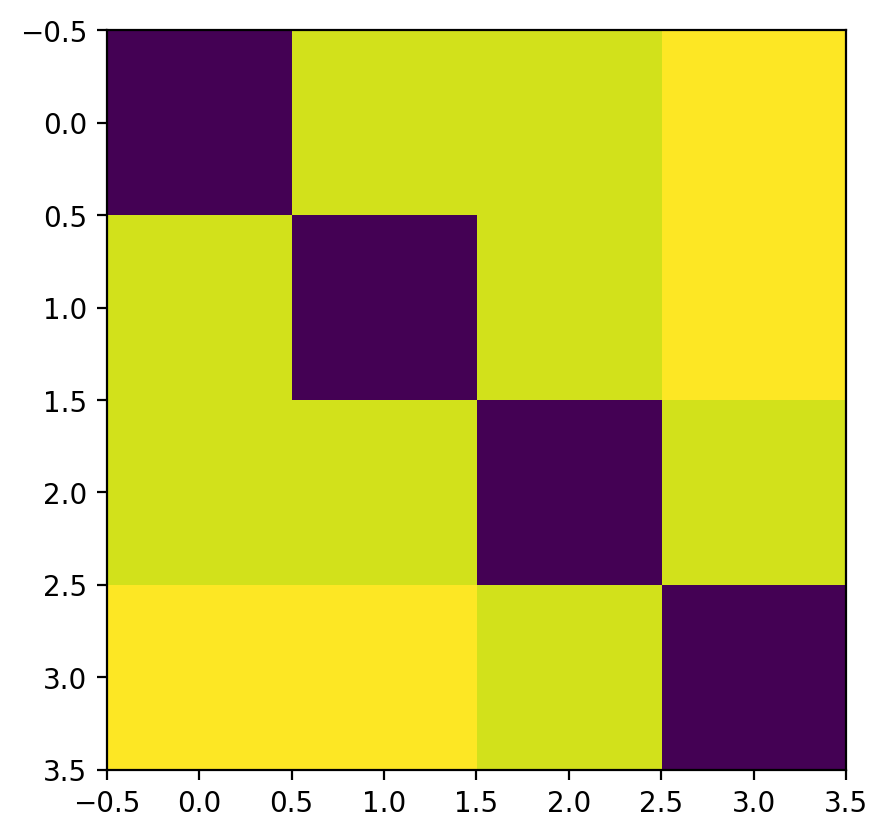

In [13]:
plt.imshow(H)

### Step 3: Find the orbital energies and coefficient matrix

Our last step will be to solve the eigenvalue problem
$$
\mathbf{H C} = \mathbf{C} \boldsymbol \varepsilon
$$

As you might have noticed, the Hamiltonian matrix is **real and symmetric**, which means that it satisfies the condition $H_{\mu \nu} = H_{\nu \mu}$. This is a special case of a more general class of matrices called Hermitian, which satisfy the condition $H_{\mu \nu} = H_{\nu \mu}^*$.
To find the eigenvalues and eigenvectors of a Hermitian matrix we will use the `numpy` function `linalg.eigh`. This function take as input the matrix and returns a tuple with the eigenvalues (orbital energies) and eigenvectors (MO coefficient matrix).
We can use `linalg.eigh` this way
```python
evals, evecs = np.linalg.eigh(H)
```

It's important to know a few things about this function:
- The eigenvalue are automatically ordered and returned in ascending order.
- The column vector `evecs[:,i]` is the eigenvector corresponding to the eigenvalue `evals[i]`.
- For a real symmetric matrix, the eigenvectors are real.
- The eigenvectors are normalized and orthogonal, that is $\mathbf{C}^\dagger \mathbf{C} = \mathbf{1}$ (identity matrix).

In [14]:
# solve the eigenvalue problem
ε, C = np.linalg.eigh(H)

print(f"orbital energies = {ε} (eV)")
print(f"C = \n{str(C)}")

orbital energies = [-13.13606919 -11.64888625 -10.6        -10.21504456] (eV)
C = 
[[-5.22720726e-01 -3.68160356e-01 -7.07106781e-01  3.02028137e-01]
 [-5.22720726e-01 -3.68160356e-01  7.07106781e-01  3.02028137e-01]
 [-6.11628457e-01  2.53622791e-01  1.89960375e-15 -7.49390492e-01]
 [-2.81845199e-01  8.15224745e-01  1.44328993e-15  5.05936655e-01]]


We should verify that these results are correct. We can do this by testing that the eigenvalue/eigenvector pairs satisfy the eigenvalue problem. We can consider the lowest eigenvalue ($\varepsilon_0 = -13.136$) and its corresponding eigenvector ($\mathbf{c}_0$) and compute both sides of the equation ($\mathbf{H} \mathbf{c}_0$) and ($\mathbf{c}_0 \varepsilon_0$) to verify they are equal

In [15]:
# compute H c_0
Hc = np.dot(H, C[:, 0])
print(f"H c_0 = {Hc}")

# compute c_0 epsilon_0
Ec = C[:, 0] * ε[0]
print(f"E c_0 = {Ec}")

# check if H c_0 = c_0 epsilon_0
print(f"H c_0 = c_0 epsilon_0: {np.allclose(Hc, Ec)}")

H c_0 = [6.86649562 6.86649562 8.03439373 3.70233803]
E c_0 = [6.86649562 6.86649562 8.03439373 3.70233803]
H c_0 = c_0 epsilon_0: True


In this case we can verify that the two quantities are close. However, there is a better way to do this. Starting from the eigenvalue equation
$$
\mathbf{H C} = \mathbf{C} \boldsymbol \varepsilon
$$
we can multiply the left-hand-side by $\mathbf{C}^\dagger$ and get
$$
\mathbf{C}^\dagger \mathbf{H C} = \underbrace{\mathbf{C}^\dagger \mathbf{C}}_{\mathbf{1}} \boldsymbol \varepsilon = \boldsymbol \varepsilon
$$
This equations tells us that the matrix $\mathbf{C}^\dagger \mathbf{H C}$ should be equal a diagonal matrix with the orbital energies as diagonal entries. Let's compute it and verify that our diagonalization procedure was performed correctly. Since in out case $\mathbf{C}$ is real, we may use the transpose (`C.T`) of $\mathbf{C}$ instead of its adjoint, since they are equivalent.

In [16]:
# compute C^T H C
CtHC = C.T @ H @ C

print(CtHC)

# check if CtHC is close to the diagonal matrix with the orbital energies
print(f"diag(C^T H C) = ε: {np.allclose(np.diag(CtHC), ε)}")

[[-1.31360692e+01 -2.05629476e-15  2.35490620e-15 -8.41988689e-16]
 [-1.72281942e-15 -1.16488863e+01 -1.11607946e-15  2.29999648e-15]
 [ 2.94902630e-15  1.22036248e-16 -1.06000000e+01 -3.79645003e-15]
 [-1.45337371e-15  1.83144515e-15 -3.14505379e-15 -1.02150446e+01]]
diag(C^T H C) = ε: True


Let's visualize the MO coefficient matrix

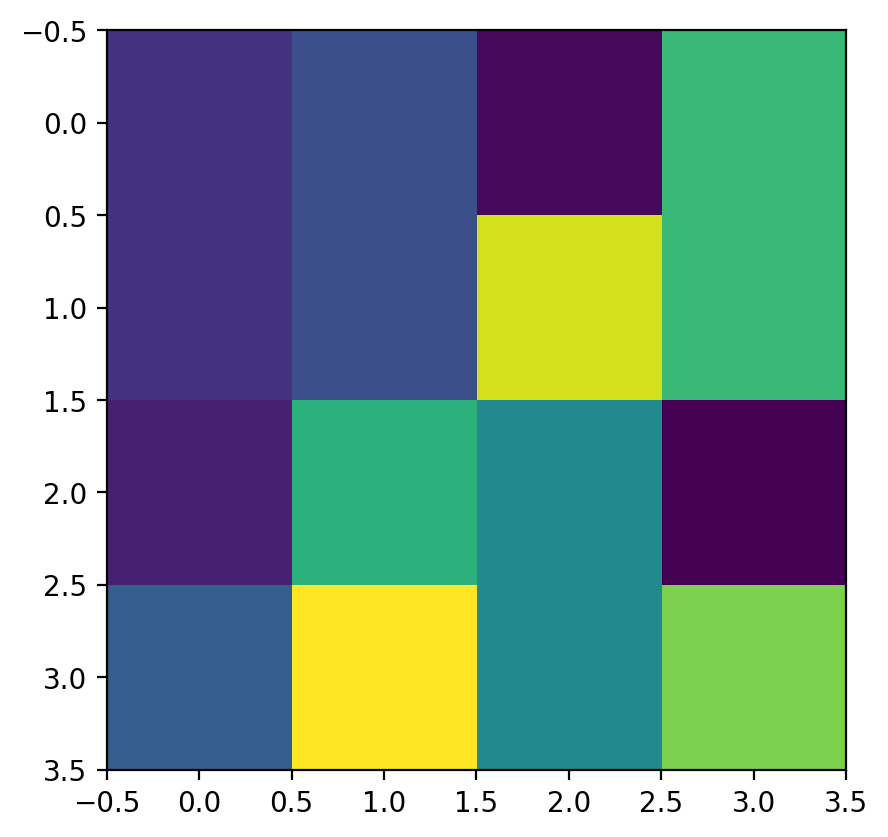

In [17]:
plt.imshow(C)

Our next step will be to make plots of the molecular orbitals. To extrac the xy coordinates of the atoms we loop over the atoms and collect the x and y values in a list of tuples.

Next we plot all of the molecular orbitals with a loop. For this molecule, there are 4π electrons, which means the lowest two energy levels are occupied and the remaining are empty.

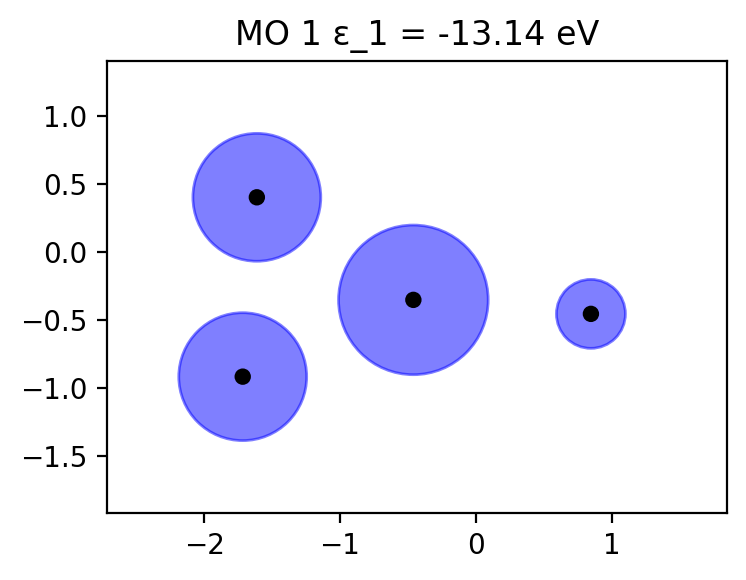

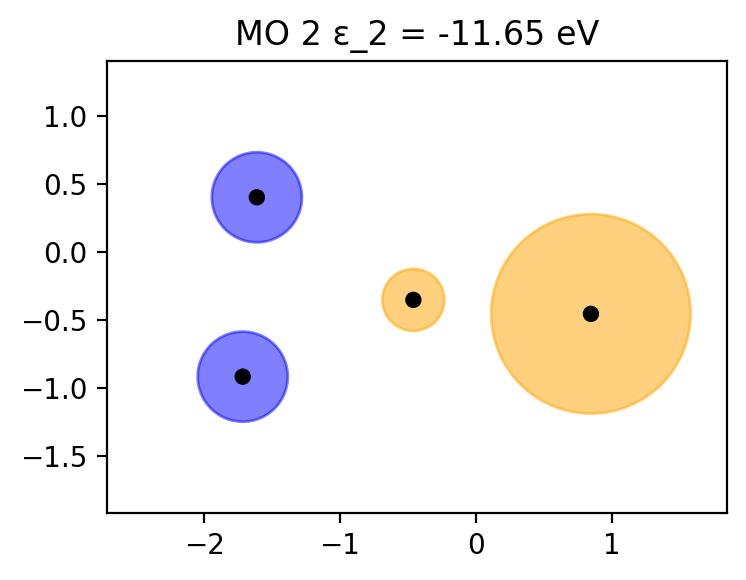

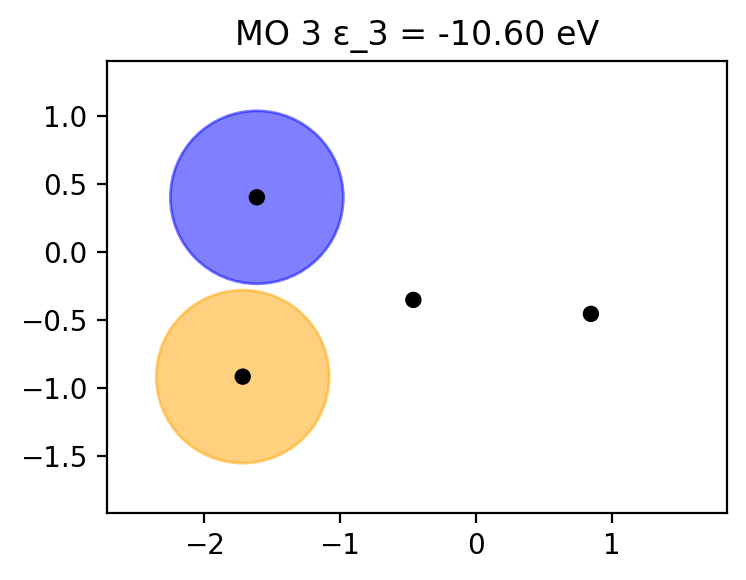

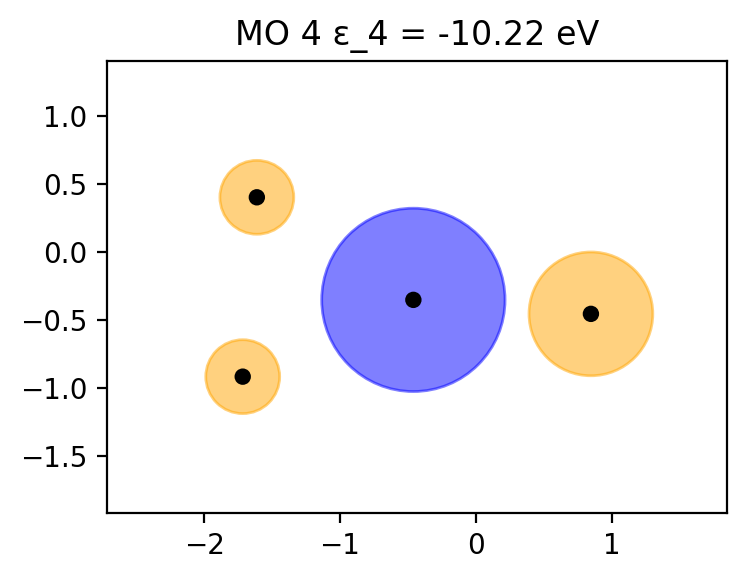

In [18]:
coordinates = [(atom[1][0],atom[1][1]) for atom in atoms]

for i in range(len(atoms)):
    plot_molecular_orbitals(coordinates, C[:,i],label=f'MO {i+1} ε_{i+1} = {ε[i]:.2f} eV')

Here is function to plot the molecular orbital energies. We have to pass it the orbital energies ($\boldsymbol \varepsilon$) and the number of π electrons (`nel`)

In [19]:
def plot_orbital_energies(orbital_energies,nel,labels=True,width=1,height=4):
    """
    Plot molecular orbital energies.
    """
    fig, ax = plt.subplots(figsize=(width,height))
    # Loop over each energy level and plot it as a horizontal line
    nocc = nel // 2 + nel % 2
    for i, energy in enumerate(orbital_energies):
        if i < nocc:
            ax.hlines(y=energy, xmin= -0.4, xmax= + 0.4, linewidth=1, color='black')
        else:
            ax.hlines(y=energy, xmin= -0.4, xmax= + 0.4, linewidth=1, color='red')
        if labels:
            ax.text(0, energy, f"{energy:.2f}", ha='center', va='bottom', fontsize=8)
    ax.set_ylim(min(orbital_energies) - 1, max(orbital_energies) + 1)
    ax.set_xlim(-0.5, 0.5)
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_ylabel('Energy (eV)')
    ax.set_title('Molecular Orbital Energies')
    plt.show()

Using this function, can examine the energy levels in the methylenecyclopropene cation

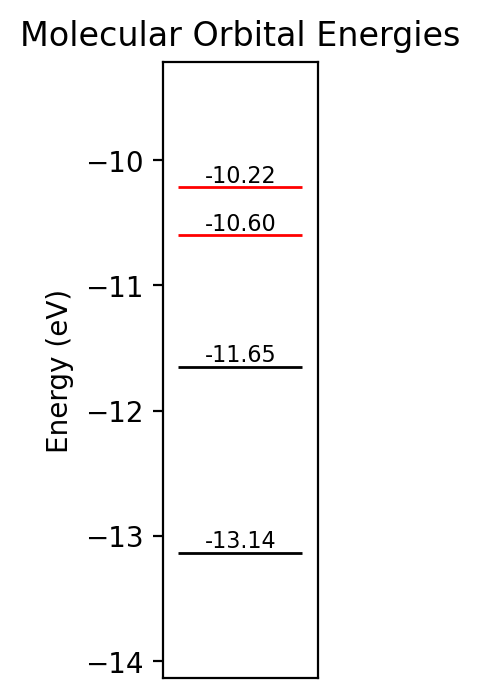

In [20]:
plot_orbital_energies(ε,len(atoms))

## Example: The molecular orbitals of a graphene nanosheet 🧪

In this example, we will apply Hückel theory to compute the energy levels of the following graphene nanosheet containing 88 carbon atoms

<center><img src="img/sheet.png" width="600" /></center>

In [21]:
atoms = read_geometry("xyz/sheet.xyz")
H = build_huckel_hamiltonian(atoms)
ε, C = np.linalg.eigh(H)

Here is a plot of the Hamiltonian matrix. As you can see it is mostly empty!

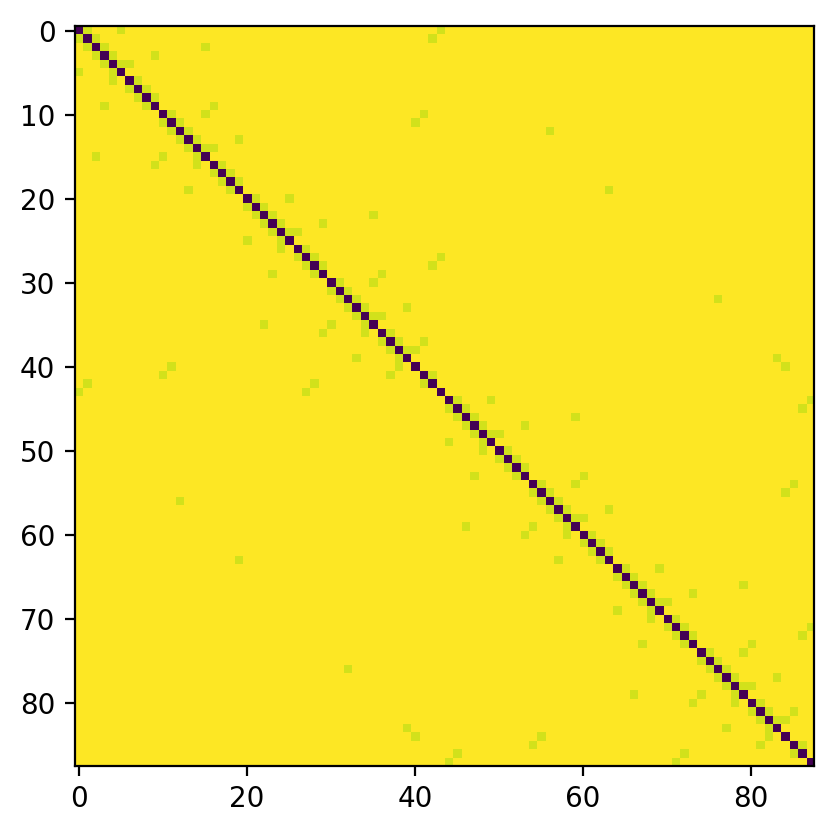

In [22]:
plt.imshow(H)

In contrast, the molecular orbital matrix is dense

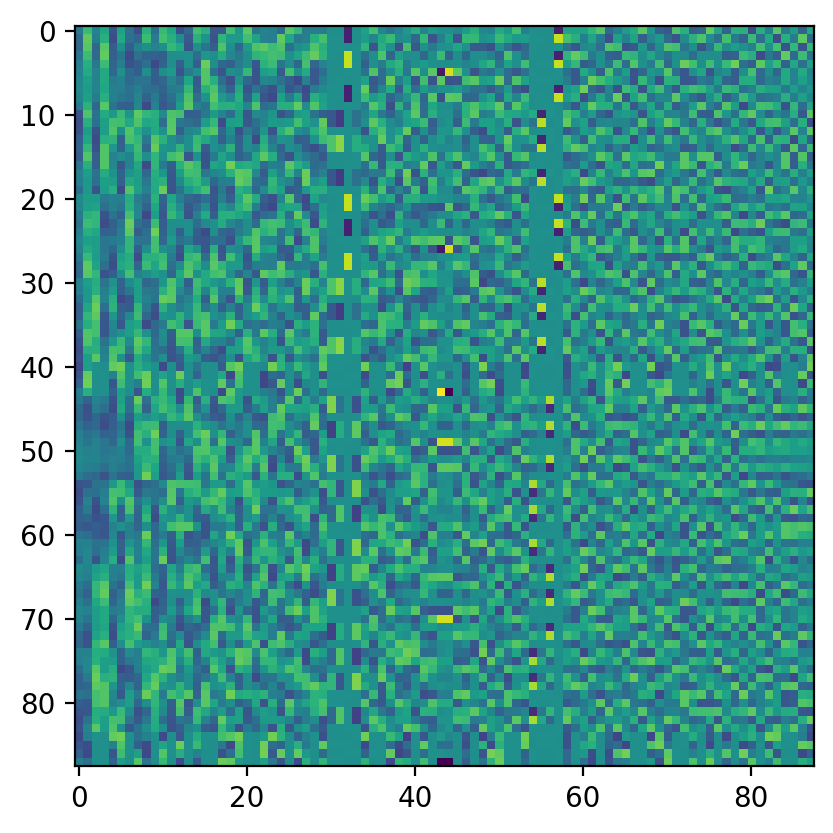

In [23]:
plt.imshow(C)

Let's calculate the HOMO-LUMO gap and plot the HOMO and LUMO

HOMO-LUMO gap = 0.145 eV


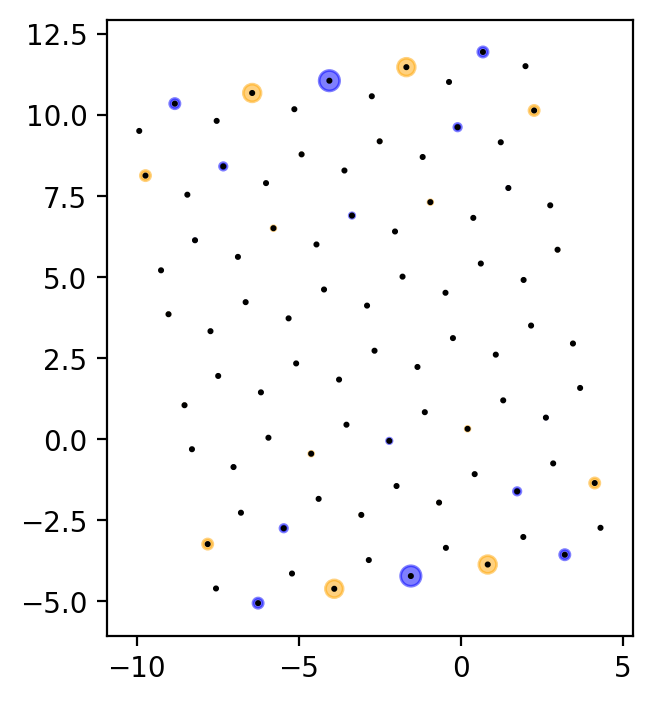

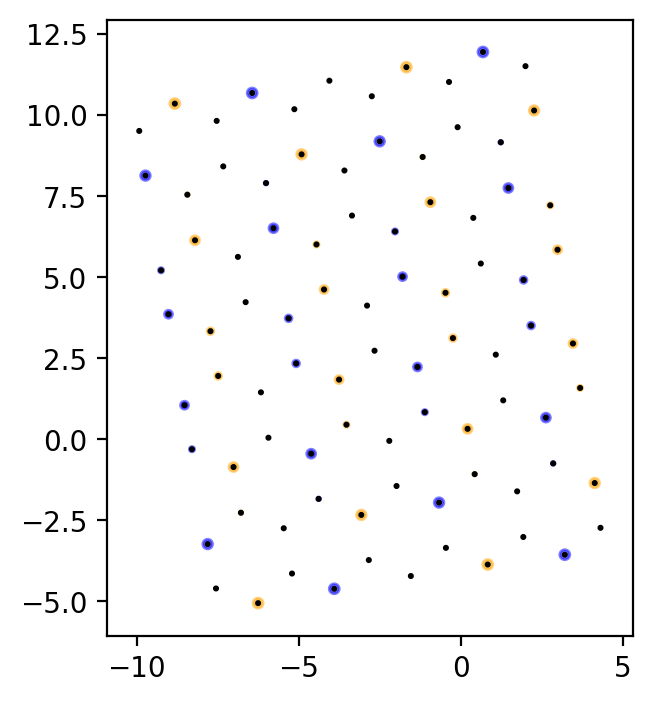

In [24]:
n_homo = len(atoms) // 2
n_lumo = n_homo + 1

print(f'HOMO-LUMO gap = {ε[n_lumo] - ε[n_homo]:.3f} eV')

coordinates = [(atom[1][0],atom[1][1]) for atom in atoms]
plot_molecular_orbitals(coordinates,C[:,n_homo])
plot_molecular_orbitals(coordinates,C[:,n_lumo])

Notice how the electrons in the HOMO are mainly localized on the edge of the sheet, while the LUMO is delocalized over then entire plane, although not all atoms participate in this orbital.

Finally, let's make a plot of the orbital energies. Here you can see how there is a buildup of levels below the HOMO and above the LUMO

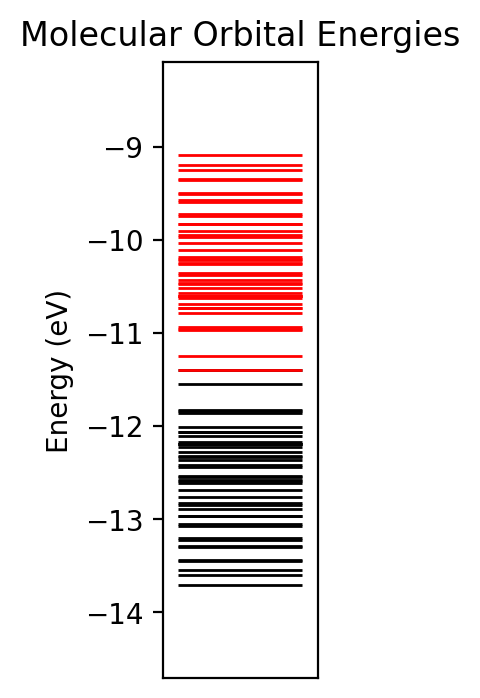

In [25]:
plot_orbital_energies(ε,len(atoms),labels=False)

This is the end of this tutorial! 🎉 In the next tutorial, we are going to consider more advanced topics related to the Hückel method and molecular orbital theory. I hope you enjoyed it and that it has sparked your curiosity to explore quantum chemistry further. See you in the next tutorial!

## Next steps

Here are some ideas on what to do next:

- Now that you have a Hückel code, try to play with it and run computations on molecules that you can build with a software like Avogradro or a website like molview.org.
- Generalize the code to heteroatoms by introducing element-specific values of $\alpha$ and $\beta$.
- Run Hückel computations on a series of hydrocarbons and find the ones that give you the smallest HOMO-LUMO gap.

## Appendix: Derivation of the eigenvalue equation

In this appendix, we will derive the Hückel eigenvalue equation starting from the following Schrödinger-like equation for the orbitals
$$
\hat{h} |\psi_i \rangle = \varepsilon_i |\psi_i \rangle
$$

We begin by inserting the expression for $|\psi_i \rangle$ expanded in a basis
$$
\hat{h} \sum_{\nu=1}^{N} |\chi_\nu\rangle C_{\nu i} = \varepsilon_i \sum_{\nu=1}^{N} |\chi_\nu\rangle C_{\nu i}
$$
Next, we left-multiply both sides by the bra element $\langle \chi_\mu |$ to get
$$
\sum_{\nu=1}^{N} \underbrace{\langle \chi_\mu | \hat{h} |\chi_\nu\rangle}_{H_{\mu\nu}} C_{\nu i} = \varepsilon_i  \sum_{\nu=1}^{N}  \underbrace{\langle\chi_\mu | \chi_\nu\rangle}_{\delta_{\mu\nu}} C_{\nu i}
$$
Here we can use the orthonormality of the atomic orbitals ($\langle\chi_\mu | \chi_\nu\rangle = \delta_{\mu\nu}$) to simplify this expression and arrive at
$$
\sum_{\nu=1}^{N} H_{\mu\nu} C_{\nu i} = C_{\mu i} \varepsilon_i
$$
which we can write in matrix notation as
$$
 \mathbf{H C} = \mathbf{C} \boldsymbol \varepsilon
$$

## Appendix: Orthogonalithy of the molecular orbitals and conditions on the coefficient matrix

In this appendix, we will determine how the orthonormality of the molecular orbitals constrains the form of the coefficient matrix.
The orthonormality condition for the molecular orbitals is given by
$$
\langle \psi_i  | \psi_j \rangle = \delta_{ij}
$$
If we expand the expression for these two orbitals in the atomic basis we get
$$
\langle \psi_i  | \psi_j \rangle = 
\sum_{\mu=1}^{N} \sum_{\nu=1}^{N} C^*_{\mu i} \langle \chi_\mu | \chi_\nu\rangle C_{\nu j}
$$
In the Hückel method, the atomic basis is assumed to be orthonormal
$$
\langle \chi_\mu | \chi_\nu \rangle = \delta_{\mu\nu}
$$
which help us simplify the expression above to
$$
\langle \psi_i  | \psi_j \rangle
= \sum_{\mu=1}^{N} \sum_{\nu=1}^{N} C^*_{\mu i} \delta_{\mu\nu} C_{\nu j}
= \sum_{\mu=1}^{N} C^*_{\mu i} C_{\mu j}
$$
When $i = j$, we have the MO normalization condition, which implies that
$$
\langle \psi_i  | \psi_i \rangle
= \sum_{\mu=1}^{N} C^*_{\mu i} C_{\mu i} = \sum_{\mu=1}^{N} |C_{\mu i}|^2 = 1
$$
This condition requires the column vectors of $\mathbf{C}$ to be normalized as well.
When $i \neq j$, we have the MO orthogonality condition, which implies that
$$
\langle \psi_i  | \psi_j \rangle
= \sum_{\mu=1}^{N} C^*_{\mu i} C_{\mu j} = 0 \quad (i \neq j)
$$
This condition requires that any two distinct column vectors of $\mathbf{C}$ must be orthogonal.
Both conditions can be expressed compactly as
$$
\mathbf{C}^\dagger \mathbf{C} = \mathbf{1}
$$
Matrices that satisfy this condition are called **unitary**.